In [1]:
# Genre Pre-Processing

import re
import numpy as np
import nltk
from tqdm import tqdm

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = 'inputs/dataset_movies.csv.csv'
path = filename
full_df = pd.read_csv(path)
full_df

,Unnamed: 0,title,overview,genres
0,0,Ariel,After the coal mine he works at closes and his...,"Comedy, Drama, Romance, Crime"
1,1,Shadows in Paradise,"Nikander, a rubbish collector and would-be ent...","Comedy, Drama, Romance"
2,2,Four Rooms,It's Ted the Bellhop's first night on the job....,Comedy
3,3,Judgment Night,"Four young friends, while taking a shortcut en...","Action, Crime, Thriller"
4,4,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,Documentary
...,...,...,...,...
613020,1017531,Agnidahan,A social drama on the issue of accusing women ...,Drama
613021,1017532,Serf,"A story about a girl, fed up with her room-mat...",Comedy
613022,1017533,Triangle,An untold perspective that captures the feelin...,Drama
613023,1017536,The Last Tape,"Beckett's ""Krapp's Last Tape"" produced by Hung...","TV Movie, Drama"


In [6]:
df = full_df[['title', 'genres', 'overview']]
df

,title,genres,overview
0,Ariel,"Comedy, Drama, Romance, Crime",After the coal mine he works at closes and his...
1,Shadows in Paradise,"Comedy, Drama, Romance","Nikander, a rubbish collector and would-be ent..."
2,Four Rooms,Comedy,It's Ted the Bellhop's first night on the job....
3,Judgment Night,"Action, Crime, Thriller","Four young friends, while taking a shortcut en..."
4,Life in Loops (A Megacities RMX),Documentary,Timo Novotny labels his new project an experim...
...,...,...,...
613020,Agnidahan,Drama,A social drama on the issue of accusing women ...
613021,Serf,Comedy,"A story about a girl, fed up with her room-mat..."
613022,Triangle,Drama,An untold perspective that captures the feelin...
613023,The Last Tape,"TV Movie, Drama","Beckett's ""Krapp's Last Tape"" produced by Hung..."


In [8]:
df['genres'].value_counts()

,count
genres,
Documentary,118661
Drama,91520
Comedy,46008
Animation,28922
Horror,22518
...,...
"Action, Comedy, Crime, Mystery, Science Fiction",1
"War, Drama, Documentary, History",1
"Adventure, Action, Science Fiction, Family",1


In [9]:
df['genres'] = df['genres'].str.split(', ')
df['genres']

,genres
0,"[Comedy, Drama, Romance, Crime]"
1,"[Comedy, Drama, Romance]"
2,[Comedy]
3,"[Action, Crime, Thriller]"
4,[Documentary]
...,...
613020,[Drama]
613021,[Comedy]
613022,[Drama]
613023,"[TV Movie, Drama]"


In [10]:
df['genres'].explode().value_counts()

,count
genres,
Drama,208570
Documentary,148008
Comedy,124341
Horror,55885
Animation,54842
Romance,48213
Thriller,46105
Action,42462
Music,42299


In [11]:
df['word_count'] = df['overview'].apply(lambda x: len(x.split()))
df['first_genre'] = df['genres'].apply(lambda x: x[0])

In [12]:
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['overview'] = df['overview'].apply(remove_special_characters)

In [13]:
def convert_to_lowercase(text):
    return text.lower()

df['overview'] = df['overview'].apply(convert_to_lowercase)
df['overview']

,overview
0,after the coal mine he works at closes and his...
1,nikander a rubbish collector and wouldbe entre...
2,its ted the bellhops first night on the joband...
3,four young friends while taking a shortcut en ...
4,timo novotny labels his new project an experim...
...,...
613020,a social drama on the issue of accusing women ...
613021,a story about a girl fed up with her roommate ...
613022,an untold perspective that captures the feelin...
613023,becketts krapps last tape produced by hungaria...


In [14]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [35]:
def print_progress():
    global index
    index += 1
    if index % 2000 == 0:
        print(index, end=' ')
    if index % 30_000 == 0:
        print()

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
index = 0
def remove_stopwords(text):
    print_progress()
    tokens = word_tokenize(text)
    # filtered_tokens = []
    return ' '.join(word for word in tokens if word.lower() not in stop_words)

df['overview'] = df['overview'].apply(remove_stopwords)
df['overview']

500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 
10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 
20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 
30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000 36500 37000 37500 38000 38500 39000 39500 40000 
40500 41000 41500 42000 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500 48000 48500 49000 49500 50000 
50500 51000 51500 52000 52500 53000 53500 54000 54500 55000 55500 56000 56500 57000 57500 58000 58500 59000 59500 60000 
60500 61000 61500 62000 62500 63000 63500 64000 64500 65000 65500 66000 66500 67000 67500 68000 68500 69000 69500 70000 
70500 71000 71500 72000 72500 73000 73500 74000 74500 75000 75500 76000 76500 77000 77500 78000 78500 79000 79500 80000 
80500 81000 81500 82000 82500 83000 83500 84000 8450

,overview
0,coal mine works closes father commits suicide ...
1,nikander rubbish collector wouldbe entrepreneu...
2,ted bellhops first night joband hotels unusual...
3,four young friends taking shortcut en route lo...
4,timo novotny labels new project experimental m...
...,...
613020,social drama issue accusing women practicing w...
613021,story girl fed roommate plans teach lesson lea...
613022,untold perspective captures feelings sorrow jo...
613023,becketts krapps last tape produced hungarian t...


In [20]:
# all words
from collections import Counter
all_words = ' '.join(df['overview']).split()
print(len(all_words))
word_counts = Counter(all_words)
print('word_counts:\n')
print(len(word_counts))
print(word_counts.most_common(10), sep='')

16122969
word_counts:

431827
[('film', 98083), ('life', 87761), ('one', 83107), ('young', 67943), ('man', 57879), ('love', 56454), ('two', 56406), ('new', 56333), ('story', 55574), ('world', 53124)]


In [23]:
del all_words

In [44]:
# rare words
threshold = 50  # Adjust this value based on your dataset and requirements
rare_words = set(word for word, count in word_counts.items() if count <= threshold)
len(rare_words)

409161

In [45]:
index = 0
def handle_rare_words(text, replacement='<UNK>'):
    print_progress()
    global rare_words
    tokens = text.split()
    # filtered_tokens = [token if token not in rare_words else replacement for token in tokens]
    return ' '.join(token for token in tokens if token not in rare_words)

In [46]:
# takes 1 minutes
df['overview'] = df['overview'].apply(handle_rare_words)

2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 22000 24000 26000 28000 30000 
32000 34000 36000 38000 40000 42000 44000 46000 48000 50000 52000 54000 56000 58000 60000 
62000 64000 66000 68000 70000 72000 74000 76000 78000 80000 82000 84000 86000 88000 90000 
92000 94000 96000 98000 100000 102000 104000 106000 108000 110000 112000 114000 116000 118000 120000 
122000 124000 126000 128000 130000 132000 134000 136000 138000 140000 142000 144000 146000 148000 150000 
152000 154000 156000 158000 160000 162000 164000 166000 168000 170000 172000 174000 176000 178000 180000 
182000 184000 186000 188000 190000 192000 194000 196000 198000 200000 202000 204000 206000 208000 210000 
212000 214000 216000 218000 220000 222000 224000 226000 228000 230000 232000 234000 236000 238000 240000 
242000 244000 246000 248000 250000 252000 254000 256000 258000 260000 262000 264000 266000 268000 270000 
272000 274000 276000 278000 280000 282000 284000 286000 288000 290000 292000 294000 296000 298000 3

In [47]:
df['overview'][0]

'coal mine works closes father commits suicide finnish man leaves city make living framed imprisoned various crimes'

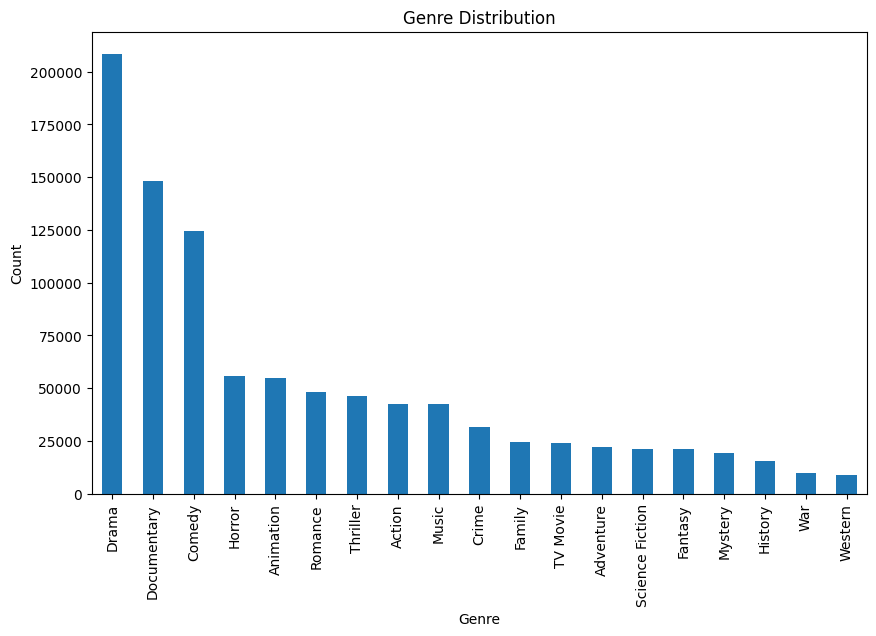

In [26]:
# visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['genres'].explode().value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

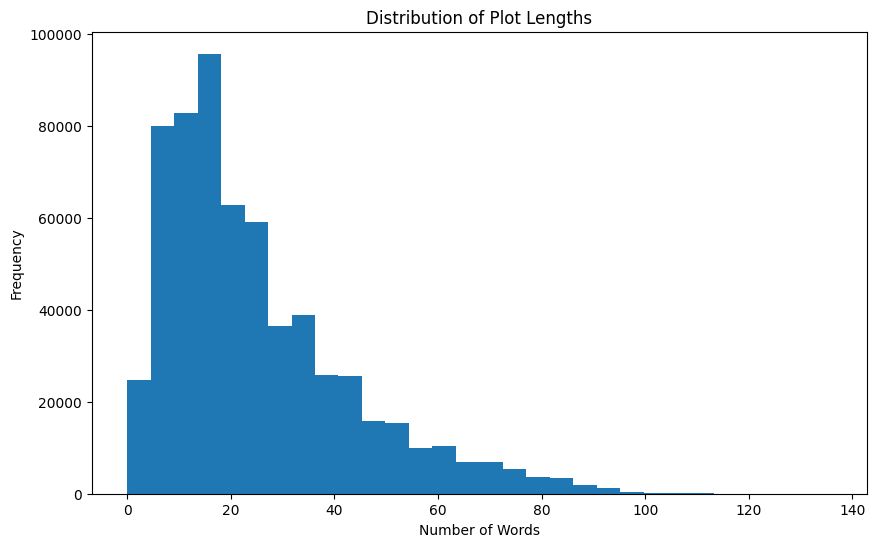

In [27]:
plt.figure(figsize=(10, 6))
df['overview'].apply(lambda x: len(x.split())).plot(kind='hist', bins=30)
plt.title('Distribution of Plot Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['overview']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Plot Descriptions')
plt.axis('off')
plt.show()

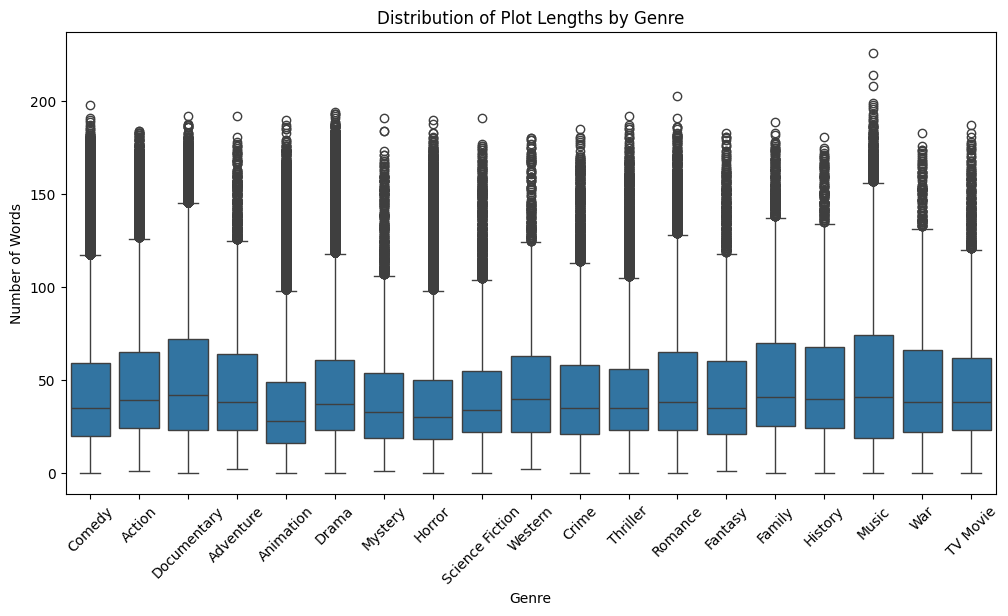

In [28]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='first_genre', y='word_count', data=df)
plt.title('Distribution of Plot Lengths by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.show()

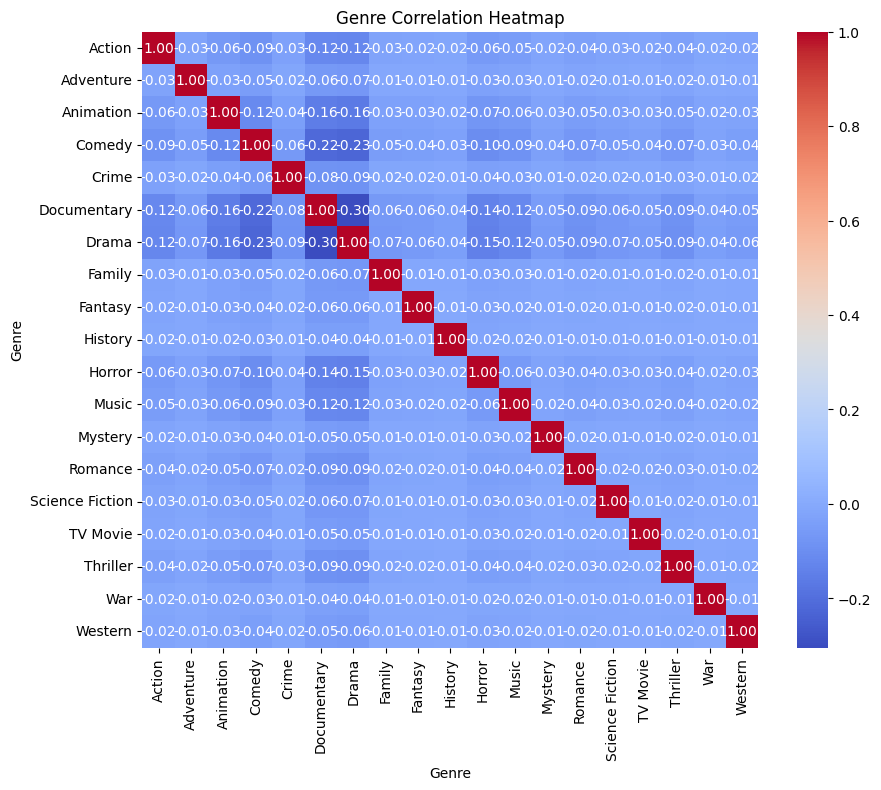

In [29]:
binary_matrix = pd.get_dummies(df['first_genre'])
correlation_matrix = binary_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Genre Correlation Heatmap')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

# **MODEL FITTING**

In [30]:
import random
import re
from collections import defaultdict

In [31]:
# Function to preprocess text: tokenize and remove special characters (excluding spaces)
def preprocess_text(text):
    # Tokenize text
    words = text.split()
    # Remove special characters (excluding spaces)
    words = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in words if 'UNK' not in word]
    # Remove empty strings
    words = [word for word in words if word.strip()]
    return words

In [54]:
def calculate_probabilities(data):
    results = {}

    for key, values in tqdm(data.items()):
        total_count = len(values)
        frequency_dict = {}

        # Подсчитываем количество вхождений каждого элемента
        for value in values:
            if value in frequency_dict:
                frequency_dict[value] += 1
            else:
                frequency_dict[value] = 1

        # Создаем пустую структуру вероятностей для текущего ключа
        probabilities = [[], []]

        # Рассчитываем вероятность и заполняем результат
        for value, count in frequency_dict.items():
            probability = count / total_count

            if probability > 0.69:
                probabilities[0].append(value)
            else:
                probabilities[1].append(value)

        results[key] = list()
        for item in probabilities:
            if item:
                results[key].extend(item)
            if item and len(item) > 3:
                break
    return results

# Пример использования
data = {
    'coal': ['mine'],
    'mine': ['works', 'works', 'marlin', 'marlin', 'marlin']
}

result = calculate_probabilities(data)
result

100%|██████████| 2/2 [00:00<00:00, 660.26it/s]


{'coal': ['mine'], 'mine': ['works', 'marlin']}

In [33]:
# Function to train Markov model
def train_markov_model(data):
    markov_model = defaultdict(list)
    for text in tqdm(data):
        words = preprocess_text(text)
        for i in range(len(words) - 1):
            current_word, next_word = words[i], words[i + 1]
            markov_model[current_word].append(next_word)
    markov_model = dict(markov_model)
    markov_model = calculate_probabilities(markov_model)
    return markov_model

In [34]:
# Train Markov model on the entire dataset
markov_model_whole = train_markov_model(df['overview'])
len(markov_model_whole)

100%|██████████| 54664/54664 [00:11<00:00, 4890.54it/s] 


54664

In [ ]:
# Function to generate plot based on Markov model
def generate_plot(markov_model, length=50):
    current_word = random.choice(list(markov_model.keys()))
    next_words = markov_model[current_word][:]
    next_words.reverse()
    plot = []
    for _ in range(length):
        if current_word in markov_model:
            next_words = markov_model[current_word][:]
            next_words.reverse()
            current_word = random.choice(markov_model[current_word])
            plot.append(current_word)
        else:
            if not next_words:
                break
            current_word = next_words.pop()
    return ' '.join(plot)

# Function to generate plot for a given genre
def generate_genre_plot(df, genre, markov_model):
    genre_subset = df[df['first_genre'] == genre]
    markov_model_genre = train_markov_model(genre_subset['overview'])
    return generate_plot(markov_model_genre)

In [55]:
# Example: Generate a plot for the 'Comedy' genre
generate_genre_plot(df, 'Comedy', markov_model_whole)

100%|██████████| 22406/22406 [00:01<00:00, 17300.22it/s]


'film india married despite bubbly experiences messing causing fire chiefs traitors movie invent criminal want ass pathological meet carnival flor left sisters leading unexpected snowstorm harry doyle jessica saunders fans truck guy charge much hilarity young belgian bike take indochina reality hooker ze de flix manager somewhat immature husband prison'

In [56]:
genre = 'Action'
generate_genre_plot(df, genre, markov_model_whole)

100%|██████████| 20327/20327 [00:00<00:00, 43665.05it/s]


'told requires seek revenge honor girlfriend blood allow track confront checkered past forever three form johnny wang xia ba wifes undercover investigation hank hank danger five rich quick money livelihood due violent gangster gangsters tied recent times get married ramesh tries trace journey proposed stone said first became yang recruited'

In [57]:
genre = 'War'
generate_genre_plot(df, genre, markov_model_whole)

100%|██████████| 10611/10611 [00:00<00:00, 114801.73it/s]


'berlin yet old army attic house end soccer career military epic event facility bay beautiful wife dies young woman secretary captured revealing documentary style angel leading final routine deserters existence main use skills combat joe wants also ready retreat concern focuses son karl killed nazis us unseen since wwii ended'

In [58]:
genre = 'Drama'
generate_genre_plot(df, genre, markov_model_whole)

100%|██████████| 22513/22513 [00:02<00:00, 9373.24it/s] 


'japanese learn song armies somehow remains forgiving communist fathers footsteps fleeing france chemist meng married early anger widow living atlantic maine instructions help join extended withdrawn 13yearold jackie demands motherhood waking 30 miles highway idea lucifer appears despondent suicide joins estranged cousin cabbage patch come busy medical funds purchase drugs'

In [59]:
genre = 'Documentary'
generate_genre_plot(df, genre, markov_model_whole)

100%|██████████| 22481/22481 [00:02<00:00, 8526.36it/s] 


'keeps revisiting film shes good response born meet barcelona driving others typical swiss women womens feelings moment cry wolf meet supporters getting day backyard style incorporates scenes transcend constructed rocks staying strong hostility safe trusting old 19 july 8th august ken creates matsumoto also sites wat troy running alone following'

In [60]:
genre = 'Horror'
generate_genre_plot(df, genre, markov_model_whole)

100%|██████████| 20038/20038 [00:00<00:00, 41131.78it/s]


'decide spy obtain illegal sheltered teen reluctantly moving forward tv adaptation edgar horrified confronted terrifying unexplainable mystery 7 dormitory leave viewers breathless marine research owner samuel settles begin hunt carried term takes unfortunate soul turning wealthy estate entertainment around traditional predators quickly curse find protecting village guided find flesh alarmed'